<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:

In [4]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [6]:
df = pd.read_csv('./train.csv')

In [7]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [8]:
df.sample(10)  # Смотрим на 10 случайных строк

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4463,1,20.15,20.15,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
4948,2,95.85,197.7,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
145,2,56.70,113.55,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,1
4265,22,89.10,1949.4,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),0
347,13,93.80,1261,Male,1,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,Month-to-month,No,Credit card (automatic),0
3276,55,50.55,2832.75,Female,0,No,No,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0
4519,3,89.85,248.4,Male,0,Yes,Yes,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,No,Electronic check,0
3685,2,45.00,96.45,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
533,72,84.10,6129.65,Female,1,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),0
3096,54,20.05,1102.4,Female,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0


In [9]:
df.info()  # Сводная статистика по датасету (явно пропущенных значений нет)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [10]:
# Кроме явно пропущенных значений (тип nan) проверим наличие пропусков текстового формата (пробел в строке)
for column in df.columns:
    if df[column].dtype == "object":
        print(
            column,
            df[column].str.isspace().sum()
        )

TotalSpent 9
Sex 0
HasPartner 0
HasChild 0
HasPhoneService 0
HasMultiplePhoneNumbers 0
HasInternetService 0
HasOnlineSecurityService 0
HasOnlineBackup 0
HasDeviceProtection 0
HasTechSupportAccess 0
HasOnlineTV 0
HasMovieSubscription 0
HasContractPhone 0
IsBillingPaperless 0
PaymentMethod 0


In [11]:
# В колонке "TotalSpent" было обнаружено 9 пропусков текстового формата, посмотрим на эти объекты:
df[df["TotalSpent"].str.isspace() == True]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [12]:
# Видим, что эти 9 пропусков соответствуют клиентам, которые первый месяц пользуются услугами провайдера.
# Это значит, что данные клиенты еще не успели внести абонентскую плату => 
# мы можем заменить пропуски нулями, исходя из бизнес-логиги. 
# Таким образом по значению признака "TotalSpent" == 0 "деревянным алгоритмам" будет проще вытащить нужные зависимости. 

df.loc[df["TotalSpent"].str.isspace() == True, "TotalSpent"] = 0

# После этого мы можем переформатировать "TotalSpent" в численный формат
df["TotalSpent"] = df["TotalSpent"].astype("float64")

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [13]:
import seaborn as sns
plt.style.use("seaborn")

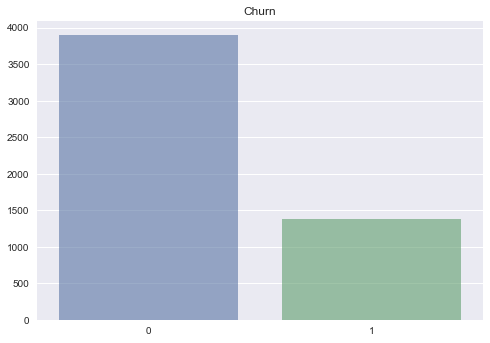

In [14]:
# Строим гистограммы для оценки целевого признака, видим что целевые классы являюется несбалансированными.
fig, ax = plt.subplots(nrows=1, ncols=1)
sns.barplot(x=df[target_col].value_counts().index, y=df[target_col].value_counts().values, ax=ax, ci=None, alpha=0.6)
ax.title.set_text(target_col)
plt.show()

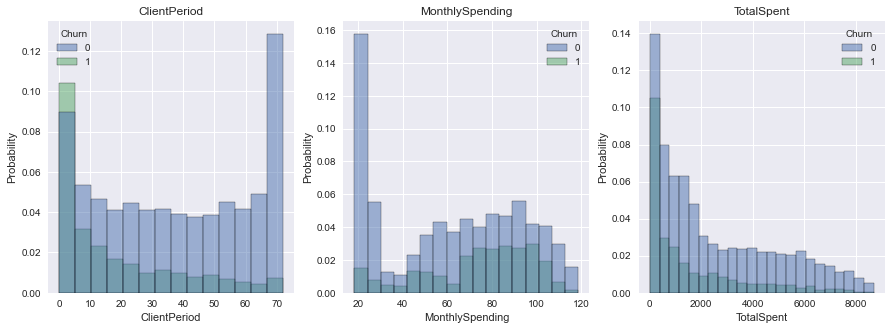

In [15]:
# Строим гистограммы для оценки численных признаков.

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for feature, ax in zip(num_cols, axes):
    sns.histplot(df, x=feature, ax=ax, hue=target_col, stat="probability")
    ax.title.set_text(feature)

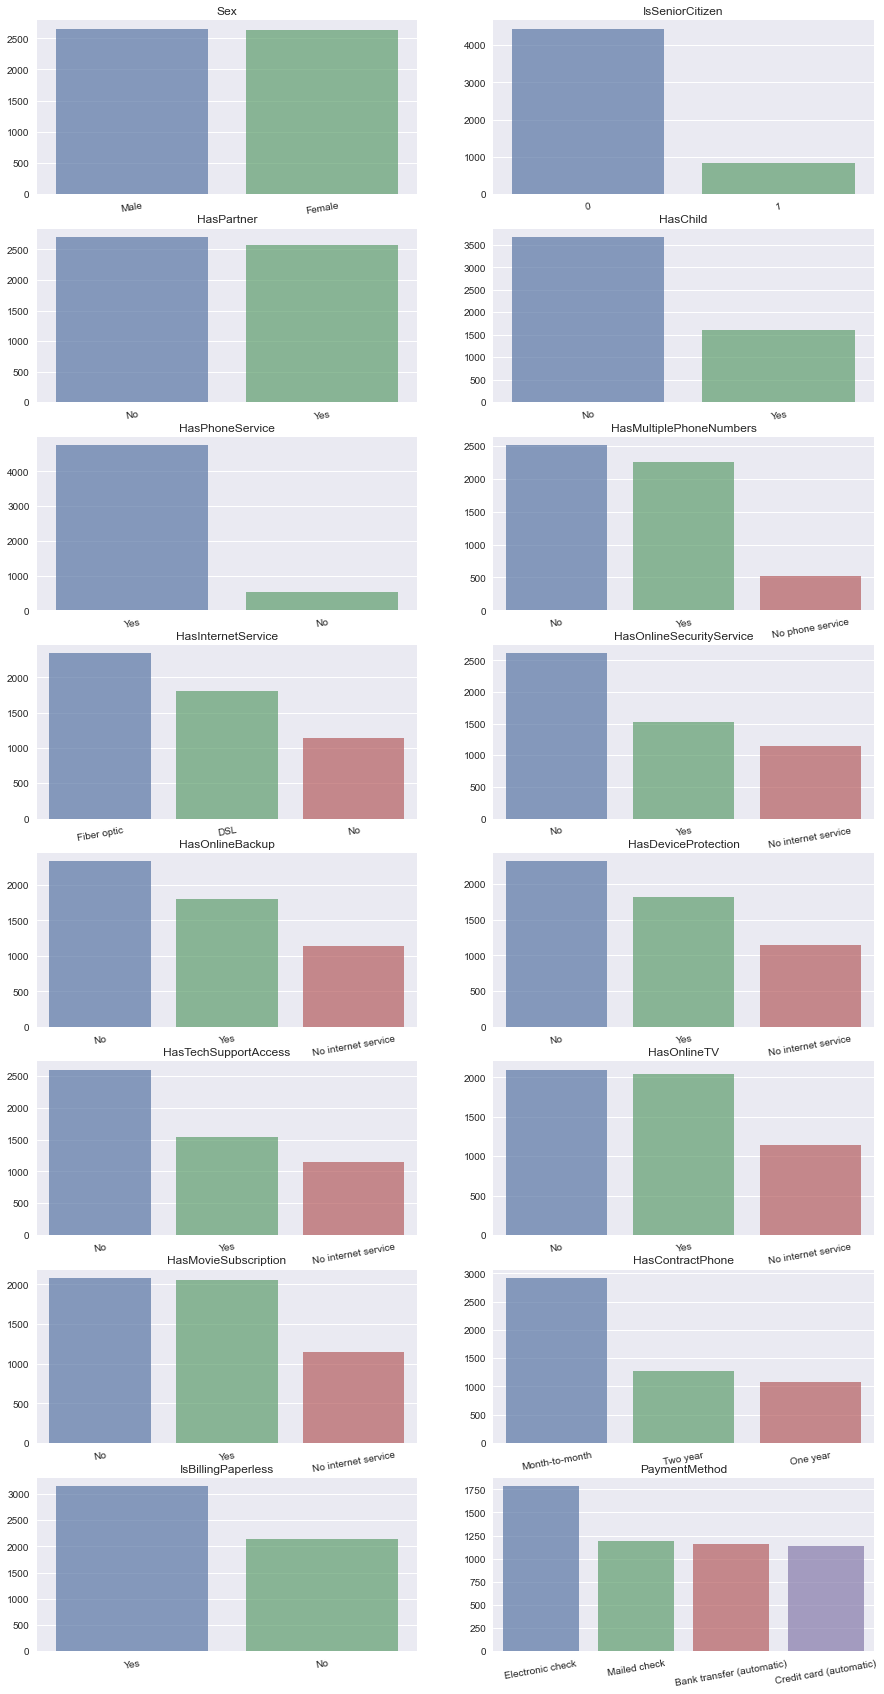

In [16]:
# Строим гистограммы для оценки категориальных признаков.

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 30))

for feature, ax in zip(cat_cols, axes.ravel()):
    sns.barplot(x=df[feature].value_counts().index, y=df[feature].value_counts().values, ax=ax, ci=None, alpha=0.7)
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=10)
    ax.title.set_text(feature)

plt.show()

In [17]:
# Соотношение категориальных признаков в численном выражении

for feature in cat_cols:
    print(f"{df[[feature]].value_counts(normalize=False)}\n")

Sex   
Male      2655
Female    2627
dtype: int64

IsSeniorCitizen
0                  4440
1                   842
dtype: int64

HasPartner
No            2705
Yes           2577
dtype: int64

HasChild
No          3676
Yes         1606
dtype: int64

HasPhoneService
Yes                4761
No                  521
dtype: int64

HasMultiplePhoneNumbers
No                         2511
Yes                        2250
No phone service            521
dtype: int64

HasInternetService
Fiber optic           2341
DSL                   1800
No                    1141
dtype: int64

HasOnlineSecurityService
No                          2612
Yes                         1529
No internet service         1141
dtype: int64

HasOnlineBackup    
No                     2332
Yes                    1809
No internet service    1141
dtype: int64

HasDeviceProtection
No                     2317
Yes                    1824
No internet service    1141
dtype: int64

HasTechSupportAccess
No                      2604
Y

In [19]:
# Также мы можем посмотреть подробную статистику по датасету с помощью инструмента ProfileReport

from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Churn Data Report", explorative=True)

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [16]:
# Подготовим списки для будущего конвейера, удалим признаки  с высокой корреляцией

drop_features = ["Sex", "MonthlySpending", "IsSeniorCitizen"]

numeric_features = ["ClientPeriod", "TotalSpent"]

categorical_features = ["HasPartner", "HasChild", "HasPhoneService",
                       "HasMultiplePhoneNumbers", "HasInternetService", "HasOnlineSecurityService", "HasOnlineBackup", "HasDeviceProtection",
                       "HasTechSupportAccess", "HasOnlineTV", "HasMovieSubscription", "HasContractPhone", "IsBillingPaperless", "PaymentMethod"]

target_feature = ["Churn"]

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [17]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

In [74]:
# Готовим Pipeline для модели логистической регрессии

# drop_transformer = ColumnTransformer(transformers=[("drop_columns", "drop", drop_features)], remainder="passthrough")

numeric_transformer = Pipeline(steps=[
("std_scaler", StandardScaler())])

categorial_transformer = Pipeline(steps=[
    ("onehot_encoding", OneHotEncoder(handle_unknown="ignore"))])

col_transformer = ColumnTransformer(transformers=[("drop_columns", "drop", drop_features),
                                                  ("numeric_processing", numeric_transformer, numeric_features),
                                                  ("categorial_processing", categorial_transformer, categorical_features)
                                                  ], remainder="drop")

pipeline_lr = Pipeline([
    ("transform_column", col_transformer),
    ("LogRegressionCV", LogisticRegressionCV(cv=10, scoring="roc_auc", random_state=99, n_jobs=-1, refit=True))
])

X = df.drop(target_feature, axis="columns")
y = df[target_feature]

In [75]:
# Обучаем модель, подбирая лучшие гиперпараметры на 10 фолдах кросс-валидации

pipeline_lr.fit(X, y)

Pipeline(steps=[('transform_column',
                 ColumnTransformer(transformers=[('drop_columns', 'drop',
                                                  ['Sex', 'MonthlySpending',
                                                   'IsSeniorCitizen']),
                                                 ('numeric_processing',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['ClientPeriod',
                                                   'TotalSpent']),
                                                 ('categorial_processing',
                                                  Pipeline(steps=[('onehot_encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HasPart...ld',
                           

In [141]:
# Считаем roc_auc на 10 фолдах кросс-валидации

score = cross_val_score(pipeline_lr, X, y, cv=10, scoring="roc_auc")

0.8442501198291652

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [142]:
print(f"Лучший ROC-AUC Score логистической регрессии на 10 фолдах кросс-валидации = {score.max():.4f}")
print(f"Параметры логистической регрессии: {pipeline_lr._final_estimator.get_params()}")

Лучший ROC-AUC Score логистической регрессии на 10 фолдах кросс-валидации = 0.8705
Параметры логистической регрессии: {'Cs': 10, 'class_weight': None, 'cv': 10, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 99, 'refit': True, 'scoring': 'roc_auc', 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [53]:
!pip install --upgrade catboost  # Устанавливаем Catboost

     |████████████████████████████████| 76.4 MB 76.7 MB/s 
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


In [54]:
from catboost import CatBoostClassifier, cv, Pool
from sklearn.model_selection import train_test_split

In [78]:
# Создаем Pipeline предобработки данных для модели гр. бустинга:

col_transformer = ColumnTransformer(transformers=[("drop_columns", "drop", drop_features),
                                                  ], remainder="passthrough")

pipeline_cb = Pipeline([
    ("transform_column", col_transformer),
])

In [104]:
X_transformed = pd.DataFrame(pipeline_cb.transform(X), columns=col_transformer.get_feature_names())

In [105]:
# Используем Grid Search CV для подбора гиперпараметров

eval_pool = Pool(X_transformed, y, cat_features=categorical_features)

model = CatBoostClassifier(loss_function='Logloss', verbose=False)

grid = {'learning_rate': [0.03, 0.05, 0.1],
        'depth': [4, 5, 6, 7],
        'l2_leaf_reg': [0.5, 1, 2]}

grid_search_result = model.grid_search(grid, eval_pool, stratified=True, shuffle=True, verbose=False, plot=False)


bestTest = 0.3754031517
bestIteration = 437


bestTest = 0.3765850073
bestIteration = 242


bestTest = 0.3753767874
bestIteration = 154


bestTest = 0.3756055348
bestIteration = 422


bestTest = 0.3773091172
bestIteration = 205


bestTest = 0.3758603527
bestIteration = 125


bestTest = 0.3755358431
bestIteration = 389


bestTest = 0.3762322179
bestIteration = 278


bestTest = 0.3766708204
bestIteration = 106


bestTest = 0.3759227539
bestIteration = 426


bestTest = 0.3765100732
bestIteration = 213


bestTest = 0.3783450987
bestIteration = 87


bestTest = 0.3763768813
bestIteration = 443


bestTest = 0.3759668021
bestIteration = 255


bestTest = 0.3778903054
bestIteration = 111


bestTest = 0.3759154554
bestIteration = 377


bestTest = 0.3767623636
bestIteration = 205


bestTest = 0.3771435254
bestIteration = 133


bestTest = 0.3772221004
bestIteration = 387


bestTest = 0.3784449475
bestIteration = 168


bestTest = 0.3814076178
bestIteration = 114


bestTest = 0.3769035892
bestIterat

In [134]:
# Сохраняем лучшие гиперпараметры

best_params = grid_search_result["params"]

In [135]:
# Разделяем данные на train/validation

X_train, X_validation, y_train, y_validation = train_test_split(
    X_transformed, y, test_size=0.8, stratify=y, shuffle=True, random_state=99
)

In [136]:
# Обучаем CatBoost с лучшими г.параметрами на train, проверяем качество на test
# используем удобную функцию защиты от переобучения

model_with_early_stop = CatBoostClassifier(
    iterations=300,
    random_seed=99,
    early_stopping_rounds=20,
    **best_params
)

model_with_early_stop.fit(
    X_train, y_train,
    cat_features=categorical_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=False
)

In [137]:
# Считаем roc_auc на валидации

y_pred = model_with_early_stop.predict_proba(X_validation)[:, 1]

score = roc_auc_score(y_validation, y_pred)

0.8427689022000833

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [140]:
print(f"ROC-AUC Score CatBoost на валидационной выборке = {score:.4f}")
print(f"Параметры CatBoost: {model_with_early_stop.get_params()}")

ROC-AUC Score CatBoost на валидационной выборке = 0.8428
Параметры CatBoost: {'iterations': 300, 'learning_rate': 0.1, 'depth': 4, 'l2_leaf_reg': 0.5, 'random_seed': 99, 'early_stopping_rounds': 20}


# Предсказания

In [208]:
best_model = pipeline_lr

In [209]:
X_test = pd.read_csv('./test.csv')

X_test[X_test["TotalSpent"].str.isspace() == True]
X_test.loc[X_test["TotalSpent"].str.isspace() == True, "TotalSpent"] = 0
X_test["TotalSpent"] = X_test["TotalSpent"].astype("float64")

submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](attachment:./kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.